In [31]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

#import pandasql as psql

In [32]:
# load the BMI dataset 

bmidata = pd.read_excel(r"C:\Users\Admin\Downloads\Raju Sir DLS\Predict_BMI.xlsx", header=0) 
bmidata.head()

,HeightM,Weightkg,Fat,BMI
0,1.60,49.44,23.9,19.31
1,1.65,62.60,28.8,22.96
2,1.65,75.75,32.4,27.79
3,1.53,48.99,25.8,20.92
4,1.45,43.09,22.5,20.38


In [33]:
# Copy file to new file 

bmidata_scaled = bmidata.copy()
col_names = ['HeightM', 'Weightkg', 'Fat', 'BMI']
features = bmidata_scaled[col_names]
features.head()

,HeightM,Weightkg,Fat,BMI
0,1.60,49.44,23.9,19.31
1,1.65,62.60,28.8,22.96
2,1.65,75.75,32.4,27.79
3,1.53,48.99,25.8,20.92
4,1.45,43.09,22.5,20.38


In [34]:
# Disply the  correlation coefficient

bmidata.corr()

,HeightM,Weightkg,Fat,BMI
HeightM,1.000000,0.687894,0.273390,0.429862
Weightkg,0.687894,1.000000,0.780368,0.946975
Fat,0.273390,0.780368,1.000000,0.862530
BMI,0.429862,0.946975,0.862530,1.000000


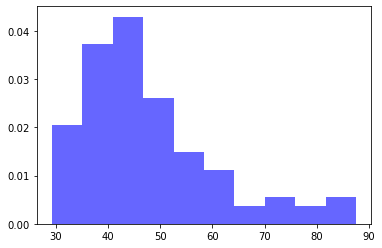

In [35]:
#import numpy as np
#import matplotlib.pyplot as plt

data1 = bmidata['Weightkg']
  
# Plotting the histogram.

plt.hist(data1, bins=10, density=True, alpha=0.6, color='b')

plt.show()

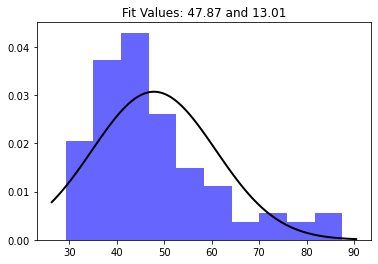

In [36]:
#import numpy as np
from scipy.stats import norm
#import matplotlib.pyplot as plt
  
data2 = bmidata['Weightkg']
  
# Fit a normal distribution to the data
# mean and standard deviation

mu, std = norm.fit(data2) 
  
# Plot the histogram

plt.hist(data2, bins=10, density=True, alpha=0.6, color='b')
  
# Plot the PDF

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

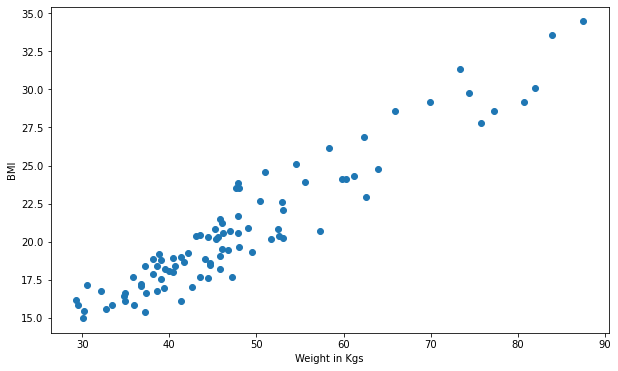

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = bmidata['Weightkg'], y = bmidata['BMI'])
plt.xlabel("Weight in Kgs")
plt.ylabel("BMI")

plt.show()

In [38]:
# The MinMax scaler is one of the simplest scalers to understand.  It just scales all the data between 0 and 1.
# Though (0, 1) is the default range, we can define our range of max and min values as well.
# MinMax Scaler => x_scaled = (x – x_min)/(x_max – x_min)

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

In [39]:
# Apply the MinMax scaler to BMI dataset

bmidata_scaled[col_names] = mmscaler.fit_transform(features.values)
bmidata_scaled.head()

,HeightM,Weightkg,Fat,BMI
0,0.818182,0.346259,0.273026,0.221880
1,0.969697,0.572066,0.434211,0.409348
2,0.969697,0.797701,0.552632,0.657422
3,0.606061,0.338538,0.335526,0.304571
4,0.363636,0.237303,0.226974,0.276836


In [40]:
# Disply the correlation coefficient (after)

bmidata_scaled.corr()

,HeightM,Weightkg,Fat,BMI
HeightM,1.000000,0.687894,0.273390,0.429862
Weightkg,0.687894,1.000000,0.780368,0.946975
Fat,0.273390,0.780368,1.000000,0.862530
BMI,0.429862,0.946975,0.862530,1.000000


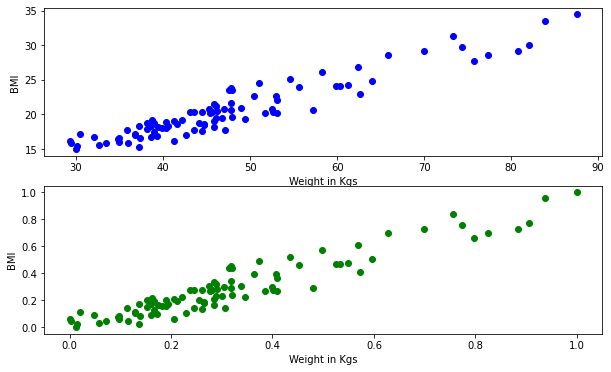

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = bmidata['Weightkg'], y = bmidata['BMI'], color = "blue")
ax[0].set_xlabel("Weight in Kgs")
ax[0].set_ylabel("BMI")

ax[1].scatter(x = bmidata_scaled['Weightkg'], y = bmidata_scaled['BMI'], color = "green")
ax[1].set_xlabel("Weight in Kgs")
ax[1].set_ylabel("BMI")

plt.show()

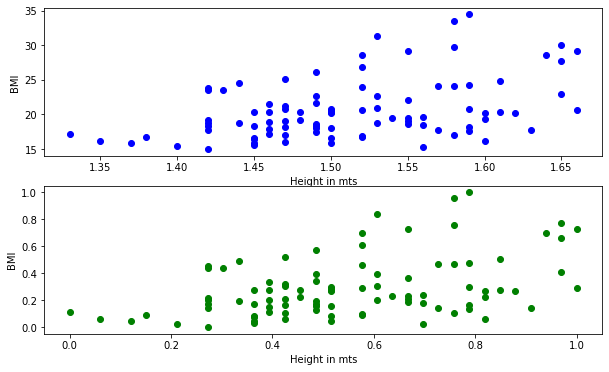

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = bmidata['HeightM'], y = bmidata['BMI'], color = "blue")
ax[0].set_xlabel("Height in mts")
ax[0].set_ylabel("BMI")

ax[1].scatter(x = bmidata_scaled['HeightM'], y = bmidata_scaled['BMI'], color = "green")
ax[1].set_xlabel("Height in mts")
ax[1].set_ylabel("BMI")

plt.show()

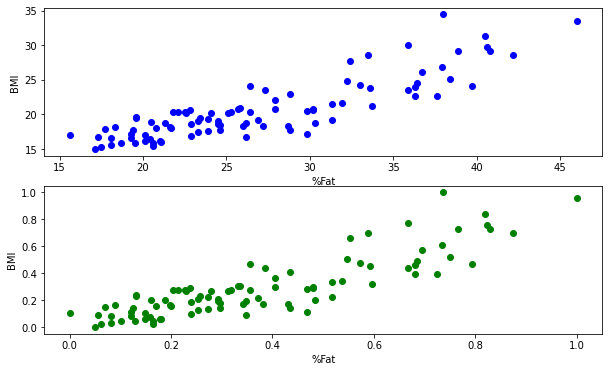

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = bmidata['Fat'], y = bmidata['BMI'], color = "blue")
ax[0].set_xlabel("%Fat")
ax[0].set_ylabel("BMI")

ax[1].scatter(x = bmidata_scaled['Fat'], y = bmidata_scaled['BMI'], color = "green")
ax[1].set_xlabel("%Fat")
ax[1].set_ylabel("BMI")

plt.show()

In [44]:
# Apply the MinMax scaler to BMI dataset with range of max and min values

from sklearn.preprocessing import MinMaxScaler
mmscaler1 = MinMaxScaler(feature_range=(5, 10))

In [45]:
# copy file to new file 

bmidata_scaled1 = bmidata.copy()
col_names1 = ['HeightM', 'Weightkg', 'Fat', 'BMI']
features1 = bmidata_scaled1[col_names1]

In [46]:
# Apply the MinMax scaler to BMI dataset

bmidata_scaled1[col_names1] = mmscaler1.fit_transform(features1.values)
bmidata_scaled1.head()

,HeightM,Weightkg,Fat,BMI
0,9.090909,6.731297,6.365132,6.109399
1,9.848485,7.860329,7.171053,7.046739
2,9.848485,8.988504,7.763158,8.287108
3,8.030303,6.692690,6.677632,6.522856
4,6.818182,6.186513,6.134868,6.384181


In [47]:
# Disply the  correlation coefficient (after)

bmidata_scaled1.corr()

,HeightM,Weightkg,Fat,BMI
HeightM,1.000000,0.687894,0.273390,0.429862
Weightkg,0.687894,1.000000,0.780368,0.946975
Fat,0.273390,0.780368,1.000000,0.862530
BMI,0.429862,0.946975,0.862530,1.000000


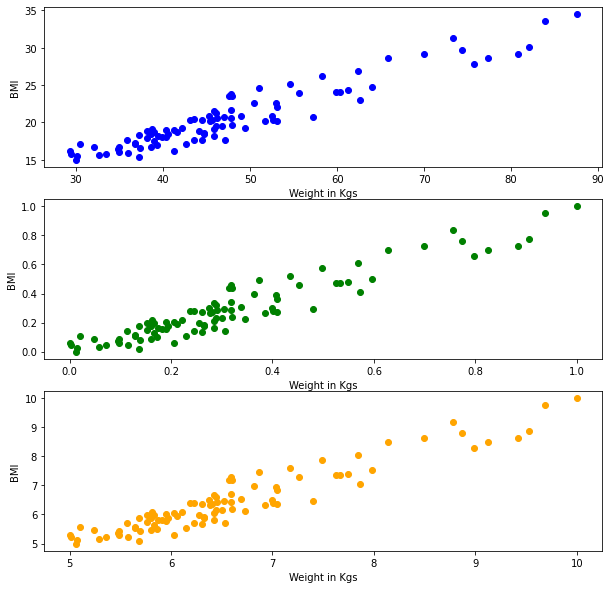

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(3, figsize=(10, 10))
ax[0].scatter(x = bmidata['Weightkg'], y = bmidata['BMI'], color = "blue")
ax[0].set_xlabel("Weight in Kgs")
ax[0].set_ylabel("BMI")

ax[1].scatter(x = bmidata_scaled['Weightkg'], y = bmidata_scaled['BMI'], color = "green")
ax[1].set_xlabel("Weight in Kgs")
ax[1].set_ylabel("BMI")

ax[2].scatter(x = bmidata_scaled1['Weightkg'], y = bmidata_scaled1['BMI'], color = "orange")
ax[2].set_xlabel("Weight in Kgs")
ax[2].set_ylabel("BMI")

plt.show()

In [49]:
# Apply the MinMax scaler to BMI dataset with range of max and min values

from sklearn.preprocessing import MinMaxScaler
mmscaler2 = MinMaxScaler(feature_range=(-1, +1))

In [50]:
# Copy file to new file 

bmidata_scaled2 = bmidata.copy()
col_names2 = ['HeightM', 'Weightkg', 'Fat', 'BMI']
features2 = bmidata_scaled2[col_names2]

In [51]:
# Apply the MinMax scaler to BMI dataset

bmidata_scaled2[col_names2] = mmscaler2.fit_transform(features2.values)
bmidata_scaled2.head()

,HeightM,Weightkg,Fat,BMI
0,0.636364,-0.307481,-0.453947,-0.556240
1,0.939394,0.144132,-0.131579,-0.181305
2,0.939394,0.595402,0.105263,0.314843
3,0.212121,-0.322924,-0.328947,-0.390858
4,-0.272727,-0.525395,-0.546053,-0.446328


KeyError: 'Weight kg'

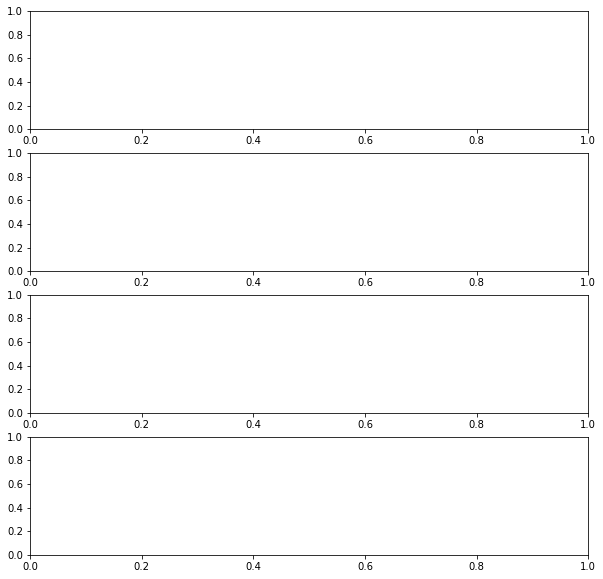

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(4, figsize=(10, 10))
ax[0].scatter(x = bmidata['Weight kg'], y = bmidata['BMI'], color = "blue")
ax[0].set_xlabel("Weight in Kgs")
ax[0].set_ylabel("BMI")

ax[1].scatter(x = bmidata_scaled['Weight kg'], y = bmidata_scaled['BMI'], color = "red")
ax[1].set_xlabel("Weight in Kgs")
ax[1].set_ylabel("BMI")

ax[2].scatter(x = bmidata_scaled1['Weight kg'], y = bmidata_scaled1['BMI'], color = "green")
ax[2].set_xlabel("Weight in Kgs")
ax[2].set_ylabel("BMI")

ax[3].scatter(x = bmidata_scaled2['Weight kg'], y = bmidata_scaled1['BMI'], color = "orange")
ax[3].set_xlabel("Weight in Kgs")
ax[3].set_ylabel("BMI")

plt.show()

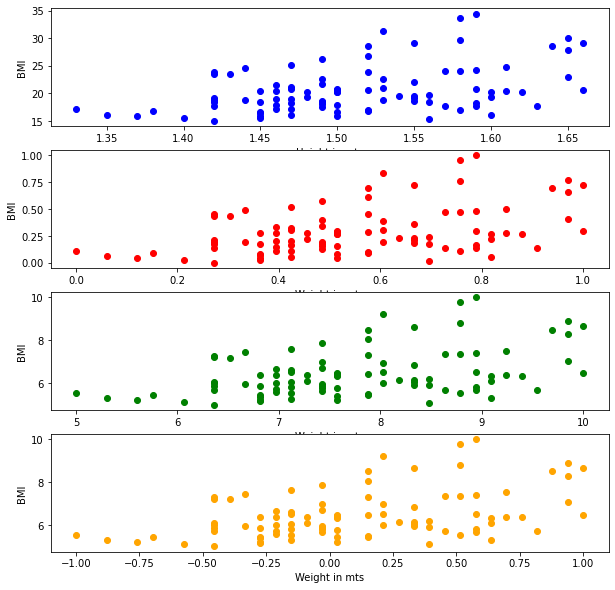

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(4, figsize=(10, 10))
ax[0].scatter(x = bmidata['HeightM'], y = bmidata['BMI'], color = "blue")
ax[0].set_xlabel("Height in mts")
ax[0].set_ylabel("BMI")

ax[1].scatter(x = bmidata_scaled['HeightM'], y = bmidata_scaled['BMI'], color = "red")
ax[1].set_xlabel("Weight in mts")
ax[1].set_ylabel("BMI")

ax[2].scatter(x = bmidata_scaled1['HeightM'], y = bmidata_scaled1['BMI'], color = "green")
ax[2].set_xlabel("Weight in mts")
ax[2].set_ylabel("BMI")

ax[3].scatter(x = bmidata_scaled2['HeightM'], y = bmidata_scaled1['BMI'], color = "orange")
ax[3].set_xlabel("Weight in mts")
ax[3].set_ylabel("BMI")

plt.show()

In [55]:
# Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the unit variance).
#   x_scaled = (x – mean)/std_dev
# Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables 
# are not normally distributed, we 
# 01) either choose a different scaler
# 02) or first, convert the variables to a normal distribution and then apply this scaler

from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()

In [56]:
bmidata_scaled3 = bmidata.copy()
col_names3 = ['HeightM', 'Weightkg', 'Fat', 'BMI']
features3 = bmidata_scaled3[col_names3]

In [57]:
bmidata_scaled3[col_names3] = stdscaler.fit_transform(features3.values)
bmidata_scaled3.head()

,HeightM,Weightkg,Fat,BMI
0,1.201636,0.121100,-0.431021,-0.324407
1,1.880693,1.132960,0.258735,0.524135
2,1.880693,2.144051,0.765494,1.647000
3,0.250956,0.086500,-0.163565,0.049882
4,-0.835536,-0.367145,-0.628094,-0.075656


In [58]:
bmidata_scaled3.describe().T

,count,mean,std,min,25%,50%,75%,max
HeightM,92.0,3.495996e-15,1.005479,-2.465273,-0.699724,-0.156478,0.794202,2.016505
Weightkg,92.0,-9.895466e-17,1.005479,-1.430521,-0.685274,-0.183765,0.372143,3.050574
Fat,92.0,2.256649e-16,1.005479,-1.599383,-0.828686,-0.205795,0.705669,2.679919
BMI,92.0,1.846349e-16,1.005479,-1.328709,-0.696952,-0.284886,0.471828,3.197624


In [59]:
bmidata_scaled3.describe()

,HeightM,Weightkg,Fat,BMI
count,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01
mean,3.495996e-15,-9.895466e-17,2.256649e-16,1.846349e-16
std,1.005479e+00,1.005479e+00,1.005479e+00,1.005479e+00
min,-2.465273e+00,-1.430521e+00,-1.599383e+00,-1.328709e+00
25%,-6.997242e-01,-6.852738e-01,-8.286864e-01,-6.969517e-01
50%,-1.564784e-01,-1.837649e-01,-2.057945e-01,-2.848857e-01
75%,7.942017e-01,3.721431e-01,7.056687e-01,4.718278e-01
max,2.016505e+00,3.050574e+00,2.679919e+00,3.197624e+00


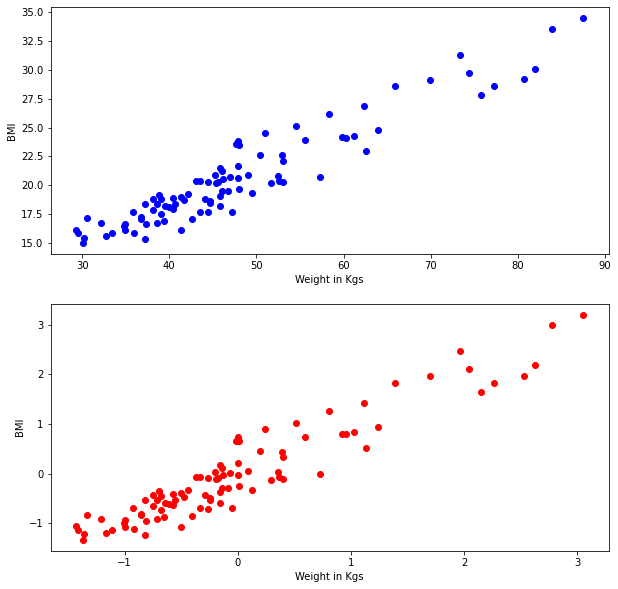

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(2, figsize=(10, 10))
ax[0].scatter(x = bmidata['Weightkg'], y = bmidata['BMI'], color = "blue")
ax[0].set_xlabel("Weight in Kgs")
ax[0].set_ylabel("BMI")

ax[1].scatter(x = bmidata_scaled3['Weightkg'], y = bmidata_scaled3['BMI'], color = "red")
ax[1].set_xlabel("Weight in Kgs")
ax[1].set_ylabel("BMI")

plt.show()

In [62]:
# Robust Scaler : This Scaler, as the name suggests is not sensitive to outliers. This scaler-
# 01) removes the median from the data
# 02) scales the data by the InterQuartile Range(IQR)
# IQR = Q3-Q1 , x_scaled = (x-Q1)/(Q3-Q1)

from sklearn.preprocessing import RobustScaler

rscaler = RobustScaler()

In [63]:
bmidata_scaled4 = bmidata.copy()
col_names4 = ['HeightM', 'Weightkg', 'Fat', 'BMI']
features4 = bmidata_scaled4[col_names4]

In [64]:
bmidata_scaled4[col_names4] = rscaler.fit_transform(features4.values)
bmidata_scaled4.head()

,HeightM,Weightkg,Fat,BMI
0,0.909091,0.288311,-0.146789,-0.033814
1,1.363636,1.245228,0.302752,0.692193
2,1.363636,2.201418,0.633028,1.652909
3,0.272727,0.255590,0.027523,0.286425
4,-0.454545,-0.173423,-0.275229,0.179015


In [65]:
bmidata_scaled4.corr()

,HeightM,Weightkg,Fat,BMI
HeightM,1.000000,0.687894,0.273390,0.429862
Weightkg,0.687894,1.000000,0.780368,0.946975
Fat,0.273390,0.780368,1.000000,0.862530
BMI,0.429862,0.946975,0.862530,1.000000


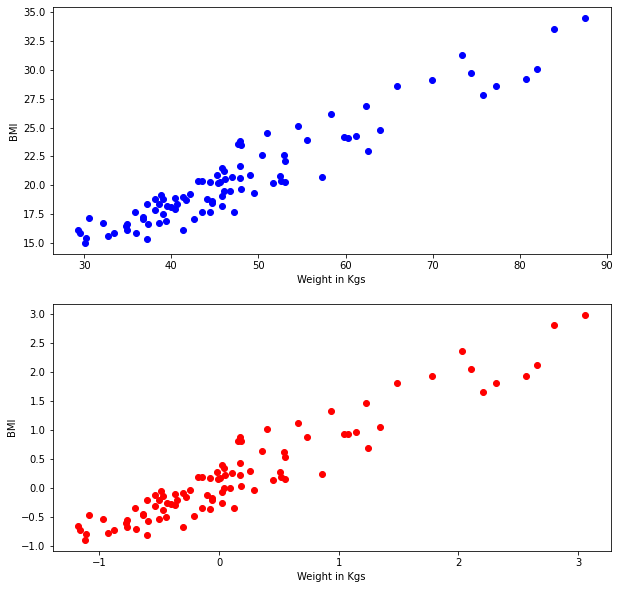

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(2, figsize=(10, 10))
ax[0].scatter(x = bmidata['Weight kg'], y = bmidata['BMI'], color = "blue")
ax[0].set_xlabel("Weight in Kgs")
ax[0].set_ylabel("BMI")

ax[1].scatter(x = bmidata_scaled4['Weight kg'], y = bmidata_scaled4['BMI'], color = "red")
ax[1].set_xlabel("Weight in Kgs")
ax[1].set_ylabel("BMI")

plt.show()

In [36]:
# Why scale, standardize, or normalize?
# Most of machine learning algorithms, such as neural networks, regression-based algorithms, K-nearest neighbors, 
# support vector machines with radial bias kernel functions, principal components analysis, and algorithms using 
# linear discriminant analysis don't perform as well if the features are not on relatively similar scales.

# 01) Use MinMaxScaler as your default
# 02) Use RobustScaler if you have outliers and can handle a larger range
# 03) Use StandardScaler if you need normalized features

In [36]:
# What is Normalization?
# Normalization is a scaling technique in which values are shifted and rescaled so that they end up 
# ranging between 0 and 1. It is also known as Min-Max scaling.

#            Formula for normalization:     x_scaled = (x – x_min)/(x_max – x_min)

# What is Standardization?
# Standardization is another scaling technique where the values are centered around the mean with 
# a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant 
# distribution has a unit standard deviation.

#            Formula for standardization: x_scaled = (x – mean)/std_dev

# The Big Question – Normalize or Standardize?
# Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate 
# on the answer in this section.

# 01) Normalization is good to use when you know that the distribution of your data does not follow a 
# Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the 
# data like K-Nearest Neighbors and Neural Networks.

# 02) Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. 
# However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have 
# a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

In [37]:
# Why Should we use Feature Scaling?

# Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it.

# 01) Gradient Descent Based Algorithms
# Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use 
# gradient descent as an optimization technique require data to be scaled

# 02) Distance-Based Algorithms
# Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because 
# behind the scenes they are using distances between data points to determine their similarity.

# 03) Tree-Based Algorithms
# Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Think about it, 
# a decision tree is only splitting a node based on a single feature. The decision tree splits a node on a 
# feature that increases the homogeneity of the node. This split on a feature is not influenced by other features.
# So, there is virtually no effect of the remaining features on the split. This is what makes them invariant to 
# the scale of the features!